Problem #1 Develop  a  computer  program  for  midpoint  method. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp


In [ ]:
def midpoint_integration(f, a, b, n):
    h = (b - a) / n
    integral = 0
    for i in range(n):
        x = a + (i + 0.5) * h
        integral += f(x)
    integral *= h
    return integral


In [ ]:
def f(x):
    return x**2+2*x+9

a = 0
b = 12
n = 10

integral = midpoint_integration(f, a, b, n)

print("The approximate value of the integral of x^2 over [0, 12] is:", integral)


The approximate value of the integral of x^2 over [0, 1] is: 826.56


Problem#2 Develop a computer program for fourth-order Runge-Kutta method.

In [ ]:
def runge_kutta(f, x0, y0, h, n):
    # f: the function that defines the differential equation y' = f(x, y)
    # x0: the initial value of x
    # y0: the initial value of y(x0)
    # h: the step size
    # n: the number of steps to take
    x = [x0]
    y = [y0]
    for i in range(n):
        k1 = h * f(x[i], y[i])
        k2 = h * f(x[i] + h/2, y[i] + k1/2)
        k3 = h * f(x[i] + h/2, y[i] + k2/2)
        k4 = h * f(x[i] + h, y[i] + k3)
        y_new = y[i] + (k1 + 2*k2 + 2*k3 + k4)/6
        y.append(y_new)
        x.append(x[i] + h)
    return x, y


In [ ]:
def f(x, y):
    return x - y

x, y = runge_kutta(f, 0, 1, 0.1, 10)
for i in range(len(x)):
    print(f"x={x[i]:.1f}, y={y[i]:.6f}")


x=0.0, y=1.000000
x=0.1, y=0.909675
x=0.2, y=0.837462
x=0.3, y=0.781637
x=0.4, y=0.740641
x=0.5, y=0.713062
x=0.6, y=0.697624
x=0.7, y=0.693171
x=0.8, y=0.698659
x=0.9, y=0.713140
x=1.0, y=0.735760


 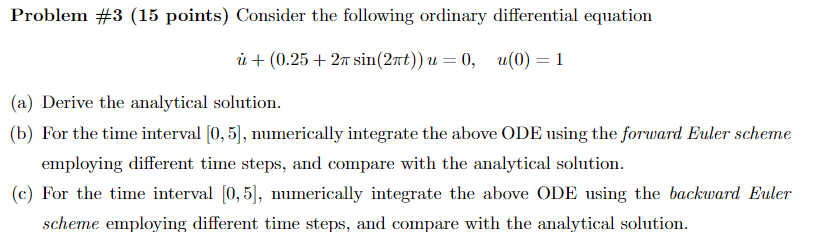

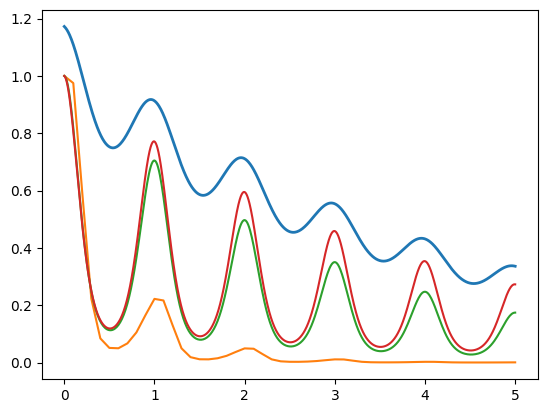

In [ ]:


def p(t):
    return 0.25 + 2 * np.pi * np.sin(2 * np.pi * t)

def analytical_solution(t):
    return 1 / np.exp(0.25 * t - (np.cos(2 * np.pi * t)) / (2 * np.pi))

def forward_euler(dt, T):
    N = int(T / dt)
    t = np.linspace(0, T, N+1)
    u = np.zeros(N+1)
    u[0] = 1

    for n in range(N):
        u[n+1] = u[n] - dt * (p(t[n]) * u[n])
    
    return t, u

T = 5
time_steps = [0.1, 0.01, 0.001]

analytical_t = np.linspace(0, T, 1000)
analytical_u = analytical_solution(analytical_t)

plt.plot(analytical_t, analytical_u, label='Analytical Solution', linewidth=2)

for dt in time_steps:
    t, u = forward_euler(dt, T)
    plt.plot(t, u, label=f'Numerical Solution (dt={dt})')



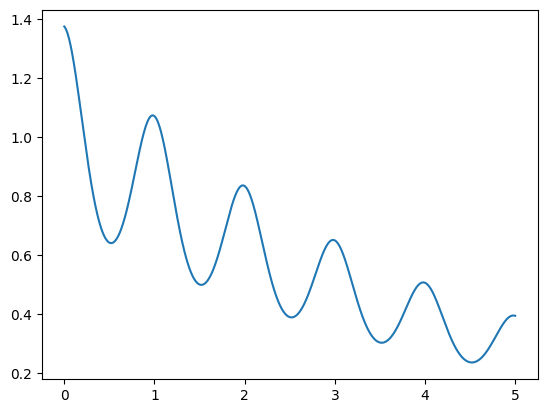

In [ ]:


def analytical_solution(t):
    return np.exp(-0.25 * t + (1 / np.pi) * np.cos(2 * np.pi * t))

def backward_euler_step(u_prev, dt, t_next):
    def nonlinear_eq(u):
        return u - u_prev - dt * (-0.25 - 2 * np.pi * np.sin(2 * np.pi * t_next)) * u
    return fsolve(nonlinear_eq, u_prev)

def backward_euler_solver(dt, T):
    n_steps = int(T / dt)
    t = np.linspace(0, T, n_steps + 1)
    u = np.zeros_like(t)
    u[0] = 1
    for i in range(n_steps):
        u[i + 1] = backward_euler_step(u[i], dt, t[i + 1])
    return t, u

T = 5
dt_values = [0.1, 0.05, 0.01]
t_analytical = np.linspace(0, T, 1000)
u_analytical = analytical_solution(t_analytical)

plt.plot(t_analytical, u_analytical)


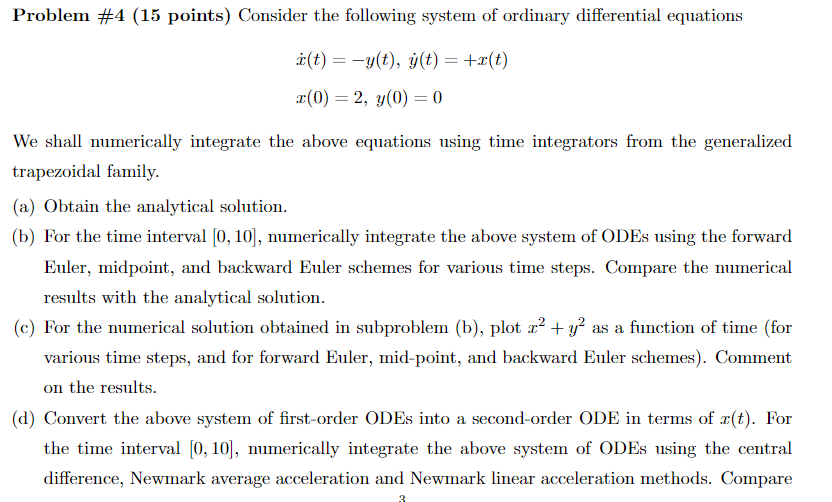
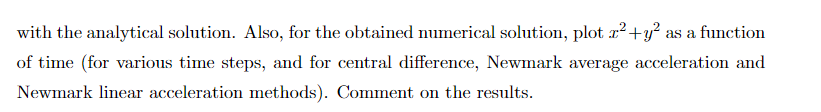

In [ ]:
def system_of_odes(t, state):
    x, y = state
    dxdt = -y
    dydt = x
    return np.array([dxdt, dydt])

initial_state = np.array([2, 0])
t_start, t_end = 0, 10


In [ ]:
def forward_euler(odes, init_state, t_start, t_end, dt):
    t = np.arange(t_start, t_end, dt)
    state = np.empty((len(t), len(init_state)))
    state[0] = init_state

    for i in range(1, len(t)):
        state[i] = state[i - 1] + dt * odes(t[i - 1], state[i - 1])

    return t, state


In [ ]:
def midpoint(odes, init_state, t_start, t_end, dt):
    t = np.arange(t_start, t_end, dt)
    state = np.empty((len(t), len(init_state)))
    state[0] = init_state

    for i in range(1, len(t)):
        k1 = odes(t[i - 1], state[i - 1])
        k2 = odes(t[i - 1] + dt / 2, state[i - 1] + dt * k1 / 2)
        state[i] = state[i - 1] + dt * k2

    return t, state


In [ ]:


def backward_euler(odes, init_state, t_start, t_end, dt):
    t = np.arange(t_start, t_end, dt)
    state = np.empty((len(t), len(init_state)))
    state[0] = init_state

    for i in range(1, len(t)):
        func = lambda new_state: new_state - state[i - 1] - dt * odes(t[i], new_state)
        state[i] = fsolve(func, state[i - 1])

    return t, state


<function matplotlib.pyplot.show(close=None, block=None)>

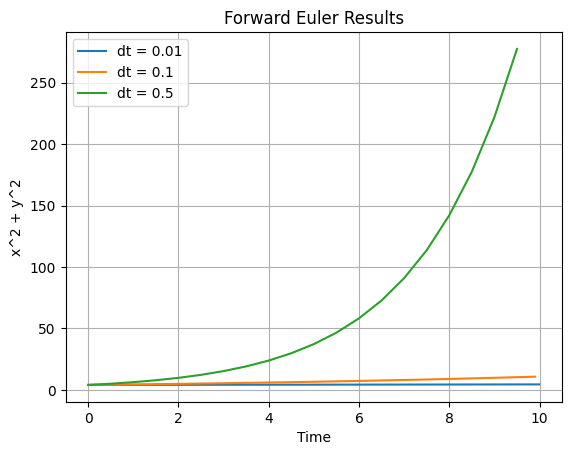

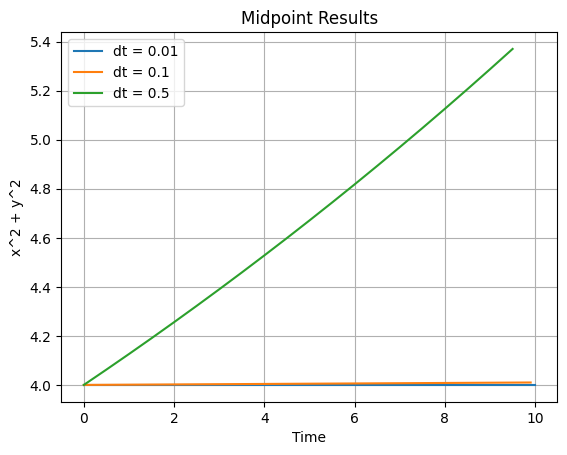

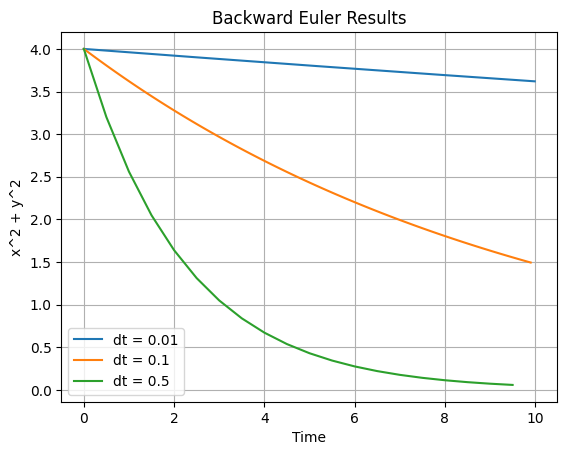

In [ ]:
time_steps = [0.01, 0.1, 0.5]

methods = {
    'Forward Euler': forward_euler,
    'Midpoint': midpoint,
    'Backward Euler': backward_euler
}

for method_name, method in methods.items():
    plt.figure()
    plt.title(f"{method_name} Results")

    for dt in time_steps:
        t, state = method(system_of_odes, initial_state, t_start, t_end, dt)
        x, y = state[:, 0], state[:, 1]
        plt.plot(t, x**2 + y**2, label=f"dt = {dt}")

    plt.xlabel("Time")
    plt.ylabel("x^2 + y^2")
    plt.legend()
    plt.grid()

plt.show


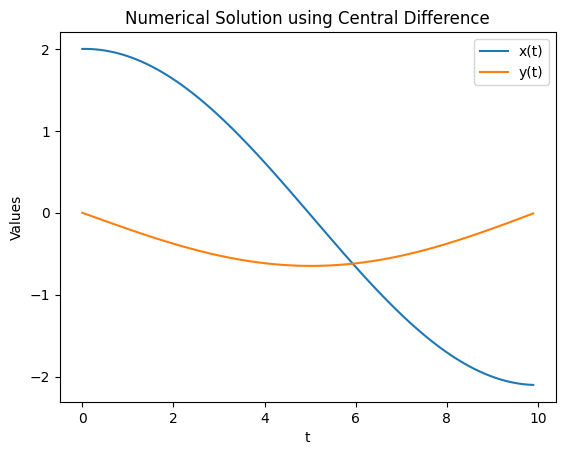

In [ ]:

def central_difference(t, x0, y0, h, n):
    x = np.zeros(n)
    y = np.zeros(n)
    x[0] = x0
    y[0] = y0
    t_values = np.arange(0, t, h)

    for i in range(n-1):
        y[i+1] = y[i] - h**2 * x[i]
        x[i+1] = x[i] + h * y[i]

    return t_values, x, y

# Parameters
t_interval = 10
h = 0.1
n = int(t_interval / h)
x0 = 2
y0 = 0

t_values, x_values, y_values = central_difference(t_interval, x0, y0, h, n)

plt.plot(t_values, x_values, label='x(t)')
plt.plot(t_values, y_values, label='y(t)')
plt.xlabel('t')
plt.ylabel('Values')
plt.legend()
plt.title('Numerical Solution using Central Difference')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def central_difference(dt, T):
    N = int(T / dt)
    x = np.zeros(N)
    v = np.zeros(N)
    x[0] = 2
    
    for i in range(1, N-1):
        x[i+1] = (2 * x[i] - x[i-1] - dt**2 * x[i]) / (1 + dt**2)
        v[i] = (x[i+1] - x[i-1]) / (2 * dt)
        
    return x, v

def newmark_average_acceleration(dt, T):
    N = int(T / dt)
    x = np.zeros(N)
    v = np.zeros(N)
    a = np.zeros(N)
    x[0] = 2
    a[0] = -x[0]
    
    for i in range(N-1):
        x[i+1] = x[i] + dt * v[i] + 0.5 * dt**2 * a[i]
        a[i+1] = -x[i+1]
        v[i+1] = v[i] + 0.5 * dt * (a[i] + a[i+1])
        
    return x, v

def newmark_linear_acceleration(dt, T):
    N = int(T / dt)
    x = np.zeros(N)
    v = np.zeros(N)
    a = np.zeros(N)
    x[0] = 2
    a[0] = -x[0]
    gamma = 1/2
    beta = 1/4
    
    for i in range(N-1):
        x[i+1] = x[i] + dt * v[i] + (1 - 2*beta) * 0.5 * dt**2 * a[i] + 2*beta * dt**2 * a[i]
        a[i+1] = -x[i+1]
        v[i+1] = v[i] + (1-gamma) * dt * a[i] + gamma * dt * a[i+1]
        
    return x, v

dt = 0.01
T = 10





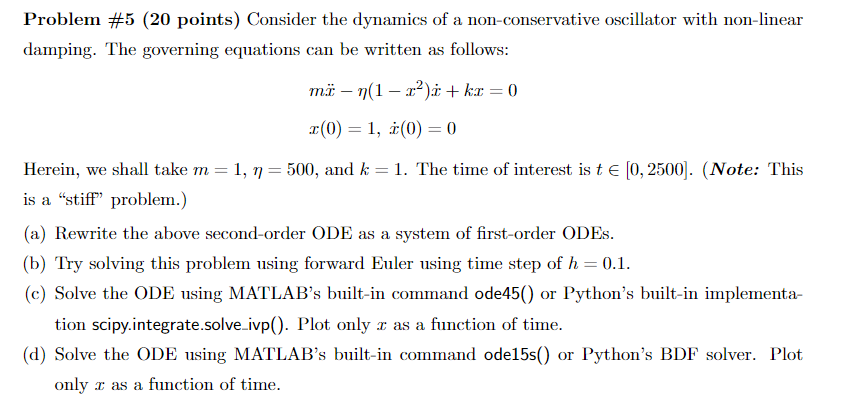

<ipython-input-28-476eae8d42db>:18: RuntimeWarning: overflow encountered in double_scalars
  v[i+1] = v[i] - h * (eta * (1 - x[i]**2) * v[i] + k * x[i])
<ipython-input-28-476eae8d42db>:18: RuntimeWarning: invalid value encountered in double_scalars
  v[i+1] = v[i] - h * (eta * (1 - x[i]**2) * v[i] + k * x[i])


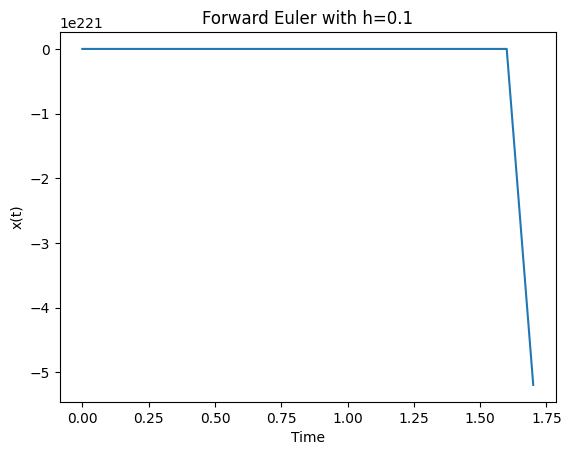

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def forward_euler(h, t_end):
    n = int(t_end / h)
    t = np.linspace(0, t_end, n)
    x = np.zeros(n)
    v = np.zeros(n)
    
    x[0] = 1
    v[0] = 0
    
    eta = 500
    k = 1
    
    for i in range(n-1):
        x[i+1] = x[i] + h * v[i]
        v[i+1] = v[i] - h * (eta * (1 - x[i]**2) * v[i] + k * x[i])
    
    return t, x

t, x = forward_euler(0.1, 2500)
plt.plot(t, x)
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.title('Forward Euler with h=0.1')
plt.show()


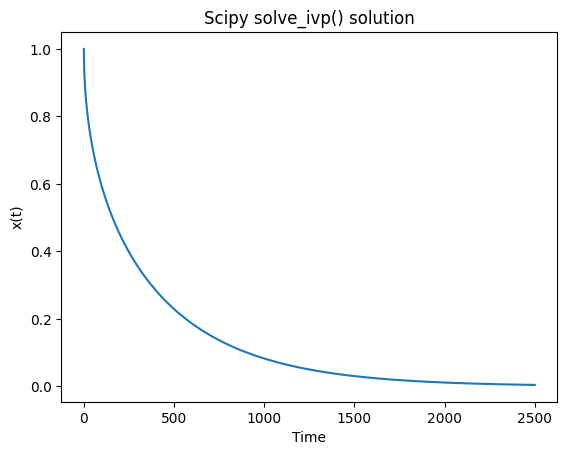

In [ ]:
from scipy.integrate import solve_ivp

def nonlinear_oscillator(t, y, eta, k):
    x, v = y
    dxdt = v
    dvdt = -eta * (1 - x**2) * v - k * x
    return [dxdt, dvdt]

eta = 500
k = 1
t_span = (0, 2500)
y0 = [1, 0]
sol = solve_ivp(nonlinear_oscillator, t_span, y0, args=(eta, k), dense_output=True)

t = np.linspace(0, 2500, 1000)
x = sol.sol(t)[0]

plt.plot(t, x)
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.title('Scipy solve_ivp() solution')
plt.show()


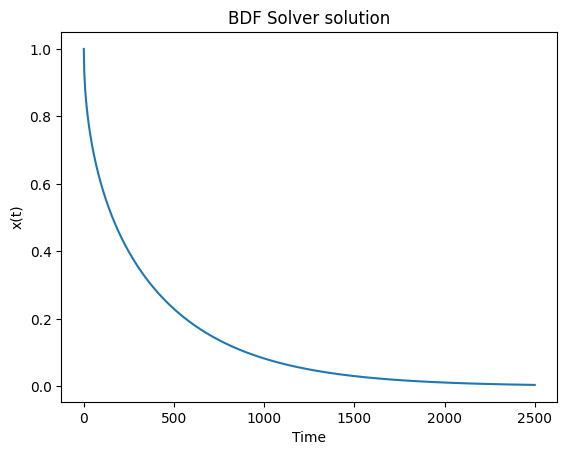

In [ ]:
sol_bdf = solve_ivp(nonlinear_oscillator, t_span, y0, args=(eta, k), method='BDF', dense_output=True)

t_bdf = np.linspace(0, 2500, 1000)
x_bdf = sol_bdf.sol(t_bdf)[0]

plt.plot(t_bdf, x_bdf)
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.title('BDF Solver solution')
plt.show()


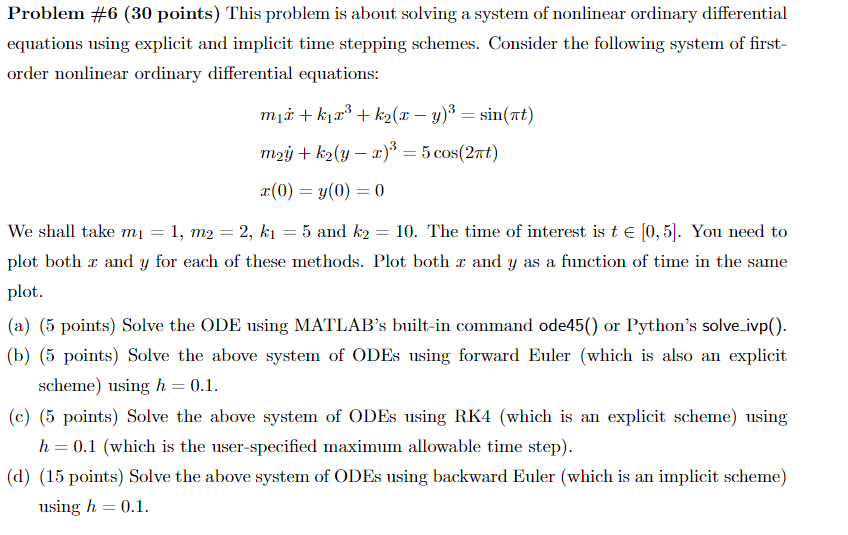

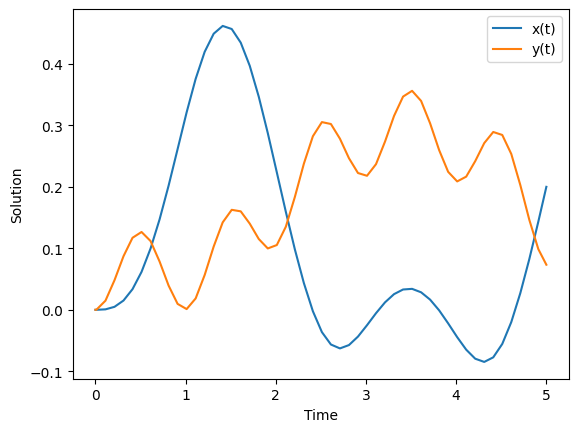

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def system(t, z):
    x, y, x_dot, y_dot = z
    dxdt = x_dot
    dydt = y_dot
    dx_dot_dt = (np.sin(np.pi * t) - 5 * x**3 - 10 * (x - y)**3) / 1
    dy_dot_dt = (5 * np.cos(2 * np.pi * t) - 10 * (y - x)**3) / 2
    return [dxdt, dydt, dx_dot_dt, dy_dot_dt]

t_span = (0, 5)
initial_conditions = [0, 0, 0, 0]

sol = solve_ivp(system, t_span, initial_conditions, max_step=0.1)

plt.plot(sol.t, sol.y[0], label='x(t)')
plt.plot(sol.t, sol.y[1], label='y(t)')
plt.xlabel('Time')
plt.ylabel('Solution')
plt.legend()
plt.show()


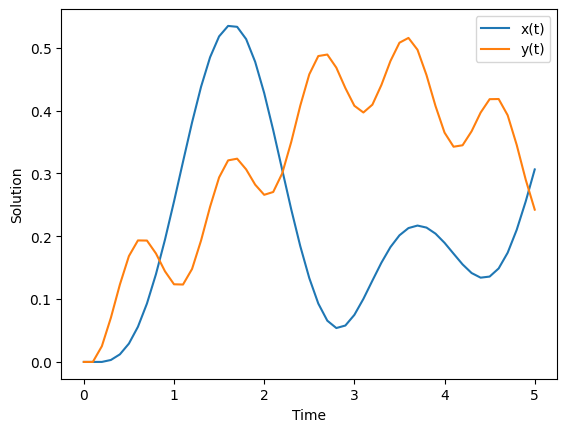

In [ ]:
def forward_euler(system, t_span, y0, h):
    n = int((t_span[1] - t_span[0]) / h) + 1
    t = np.linspace(t_span[0], t_span[1], n)
    y = np.zeros((len(y0), n))
    y[:, 0] = y0

    for i in range(n - 1):
        y[:, i + 1] = y[:, i] + h * np.array(system(t[i], y[:, i]))

    return t, y

y0 = [0, 0, 0, 0]
t, y = forward_euler(system, t_span, y0, h=0.1)

plt.plot(t, y[0], label='x(t)')
plt.plot(t, y[1], label='y(t)')
plt.xlabel('Time')
plt.ylabel('Solution')
plt.legend()
plt.show()


In [ ]:
m1 = 1
m2 = 2
k1 = 5
k2 = 10

def f(t, u):
    x, y, dx, dy = u
    ddx = (np.sin(np.pi * t) - k1 * x**3 - k2 * (x - y)**3) / m1
    ddy = (5 * np.cos(2 * np.pi * t) - k2 * (y - x)**3) / m2
    return [dx, dy, ddx, ddy]

t_span = (0, 5)
y0 = [0, 0, 0, 0]


In [ ]:
def rk4(f, t_span, y0, h):
    t = np.arange(t_span[0], t_span[1] + h, h)
    y = np.zeros((len(t), len(y0)))
    y[0] = y0

    for i in range(1, len(t)):
        k1 = h * np.array(f(t[i-1], y[i-1]))
        k2 = h * np.array(f(t[i-1] + h/2, y[i-1] + k1/2))
        k3 = h * np.array(f(t[i-1] + h/2, y[i-1] + k2/2))
        k4 = h * np.array(f(t[i-1] + h, y[i-1] + k3))
        y[i] = y[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6
    return t, y


In [ ]:
def backward_euler(f, t_span, y0, h):
    def residual(Y_next, Y_curr, t_next):
        return Y_next - Y_curr - h * np.array(f(t_next, Y_next))

    t = np.arange(t_span[0], t_span[1] + h, h)
    y = np.zeros((len(t), len(y0)))
    y[0] = y0

    for i in range(1, len(t)):
        y_guess = y[i - 1] + h * np.array(f(t[i - 1], y[i - 1]))
        y[i] = fsolve(residual, y_guess, args=(y[i - 1], t[i]))
    return t, y


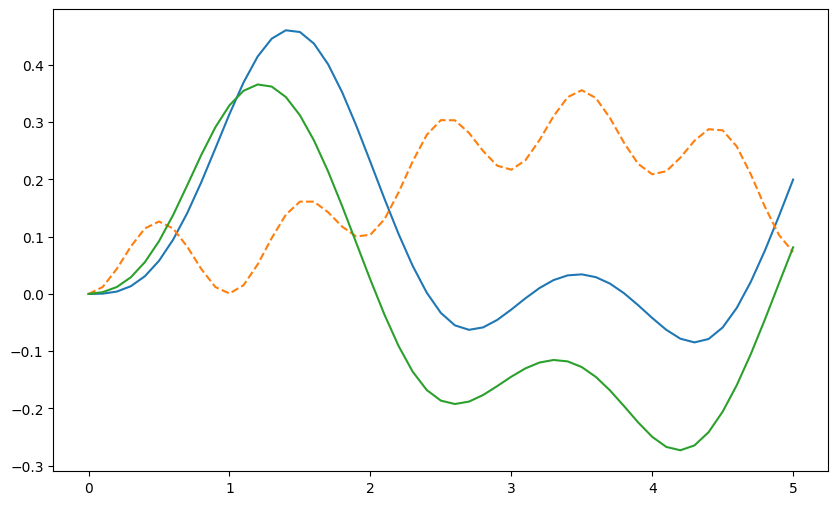

In [ ]:
h = 0.1
t_rk4, y_rk4 = rk4(f, t_span, y0, h)
t_be, y_be = backward_euler(f, t_span, y0, h)

plt.figure(figsize=(10, 6))
plt.plot(t_rk4, y_rk4[:, 0], label='RK4 x(t)', linestyle='-')
plt.plot(t_rk4, y_rk4[:, 1], label='RK4 y(t)', linestyle='--')
plt.plot(t_be, y_be[:, 0], label='Back')
